In [1]:
from cv2_v2 import *


fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'
clr=color_schema('yellow')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

In [4]:
from cv2_v2 import *
fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'

#fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/68653571067__FCF9D813-5942-4A11-BD7B-0F75D71F1F49.jpg'

img=cv2.imread(fn)#read file

clr=color_schema('green')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

imgray = cv2.cvtColor(value, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

v=cv2.drawContours(value, contours, -1, (0,255,0), 3)

font = cv2.FONT_HERSHEY_COMPLEX

# Going through every contours found in the image.
for cnt in contours :
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
  
    # draws boundary of contours.
    cv2.drawContours(value, [approx], 0, (0, 0, 255), 5) 
  
    # Used to flatted the array containing
    # the co-ordinates of the vertices.
    n = approx.ravel() 
    i = 0
  
    for j in n :
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]
  
            # String containing the co-ordinates.
            string = str(x) + " " + str(y) 
  
            if(i == 0):
                # text on topmost co-ordinate.
                cv2.putText(img, "Arrow tip", (x, y),
                                font, 0.5, (255, 0, 0)) 
            else:
                # text on remaining co-ordinates.
                #cv2.putText(img, string, (x, y), 
                          #font, 0.5, (0, 255, 0)) 
                pass
        i = i + 1

#new=img   

print(cv2)
        
moment_display(img)

#moment_display(new)

<module 'cv2' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cv2/__init__.py'>


0

# Consolidated def functions with results 

#### Phase 1: Translating picture of rock climbing wall to x-y graph of invidual center holds
    1.Image is ingested
    2.Image is changed to RGB/RBG to HSV in order to better differentiate the holds/objects of interest
    3.Predisposed color ranges have been coded and can be chosen in order to help user 
    4.Additional sliders can be used to change the hue,saturation,and value in order to best isolate the color-specific holds of interest from all other holds and wall
    5.Once appropriate holds are isolated and result is appropriate to user, a k-means classificaiton is used to find the center of each hold
    6. The number of holds need to be inputted in order to properly determine the center (would be best to not have to do that)
    7. Centers of each hold is then visualized on a separate x-y axis in order to start phase.
    
#### Phase 2: Using the center holds and finding best hand and feet path based on human biomechanics 
    1. Create human cody constraints 
    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


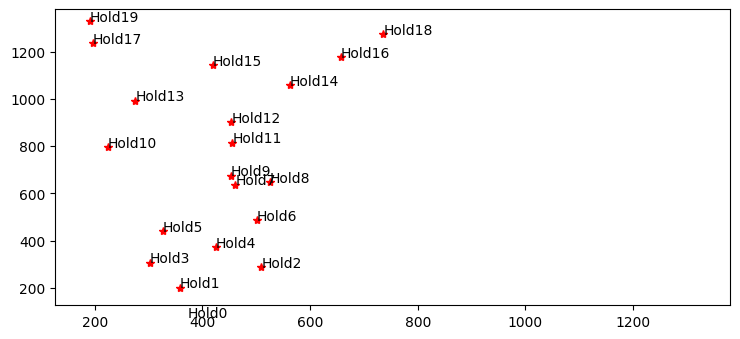

In [13]:
from cv2_v2 import *
#fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'

f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
#image='245379234_4650402895027244_263010799927765806_n.jpeg'
image='rc_sample_3.jpeg'

fn=f+image
img=cv2.imread(fn)#read file

clr=color_schema('blue')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

img,coordinates=trace_pathx(path=fn,value=value)#

#centroids=find_centroids(coordinates,n_clusters=23) #static finding centroids 

centroids=find_holds(path=fn,coordinates=coordinates)#dynamically finding centroids

#centroids
simple_plot(centroids)





In [8]:
f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
image='rc_sample_3.jpeg'
path_result=f+image
img=cv2.imread(path_result) 
font = cv2.FONT_HERSHEY_COMPLEX

x=centroids[::2] 
y=centroids[1::2] 

for i,j in zip(x,y):
    
    cv2.putText(img, "X", (int(i), int(j)), font, 0.8, (30, 40, 0)) 

moment_display(img)

0

In [8]:
import time

f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
image='rc_sample_3.jpeg'
path_result=f+image
img=cv2.imread(path_result)
cv2.namedWindow('image')
cv2.createTrackbar('Number','image',5,49,empty)
font = cv2.FONT_HERSHEY_COMPLEX


while(True):

        # for button pressing and changing
    k = cv2.waitKey(1) & 0xFF
        #once "ESC" button is pressed, loop breaks (true for linux)
    if k == 27:

        break
        #retrieving the min max values based on track bar position 
    n= cv2.getTrackbarPos('Number', 'image')
    if n ==-1:
        pass
    else:
        centroids=find_centroids(coordinates,n_clusters=n)

    x=centroids[::2] 
    y=centroids[1::2] 
    for i,j in zip(x,y):
    
        cv2.putText(img, "X", (int(i), int(j)), font, 0.8, (30, 40, 0)) 

    cv2.imshow('image',img)
    img=cv2.imread(path_result)
    #time.sleep(0.5)
cv2.destroyAllWindows();cv2.waitKey(1);

In [15]:


f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
image='rc_sample_3.jpeg'
path_result=f+image
img=cv2.imread(path_result) 
cv2.namedWindow('result')
cv2.createTrackbar('Number','result',1,49,empty)
cv2.imshow('result',img)
    
cv2.waitKey(0);cv2.destroyAllWindows();cv2.waitKey(1);

In [12]:
def find_holds(path,coordinates):

    img=cv2.imread(path)
    cv2.namedWindow('image')
    cv2.createTrackbar('Number','image',5,49,empty)
    font = cv2.FONT_HERSHEY_COMPLEX


    while(True):

            # for button pressing and changing
        k = cv2.waitKey(1) & 0xFF
            #once "ESC" button is pressed, loop breaks (true for linux)
        if k == 27:

            break
            #retrieving the min max values based on track bar position 
        n= cv2.getTrackbarPos('Number', 'image')
        if n ==-1:
            pass
        else:
            centroids=find_centroids(coordinates,n_clusters=n)

        x=centroids[::2] 
        y=centroids[1::2] 
        for i,j in zip(x,y):

            cv2.putText(img, "X", (int(i), int(j)), font, 0.8, (30, 40, 0)) 

        cv2.imshow('image',img)
        img=cv2.imread(path_result)
        #time.sleep(0.5)
    cv2.destroyAllWindows();cv2.waitKey(1);
    
    return centroids

In [39]:
x=[0,4,4,1]
y=[9,2,5,1]

k = sorted(set(zip(x,y)))
a=zip(x,y)
b=sorted(set(a))

for i, j in sorted(set(zip(x,y))): 
    #plt.text(i, j+0.5, '({}, {})'.format(i, j))
    #plt.text(i, j+0.5, 'Hold'+str(num) )
    print('{},{}'.format(i,j))
    #k.append((i,j))# turn into tu




0,9
1,1
4,2
4,5
